<a href="https://colab.research.google.com/github/gopukrisnaa/Cars-price-and-class-prediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
cars=pd.read_csv("Cars_price.csv")

In [ ]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

***Understanding the data***

In [ ]:
cars['symboling'].astype('category').value_counts()

#symboling represents the level of risk

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
cars['aspiration'].astype('category').value_counts()

#aspiration - std and turbo is the oxygen intake property


std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<ipython-input-9-14ae02024d2e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['wheelbase'])


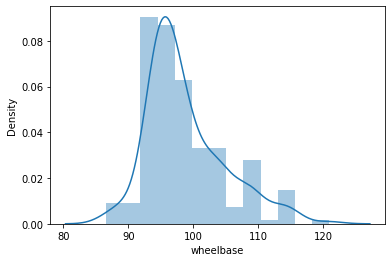

In [ ]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

<ipython-input-10-17e3b5d273f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


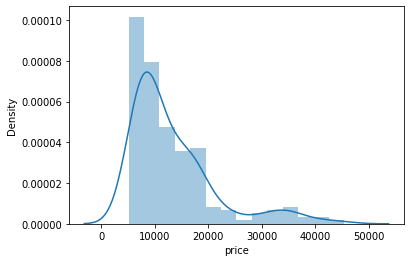

In [ ]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

***Data Exploration***

In [ ]:
#Float and integer variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])


In [ ]:
# correlation matrix to check the correlation between the variables
correlation = cars_numeric.corr()
correlation

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


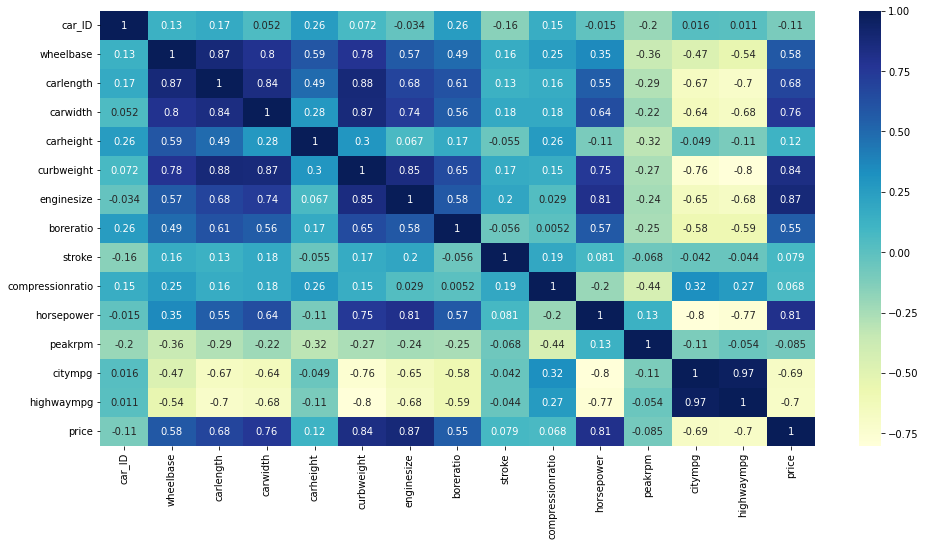

In [ ]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

<Axes: >

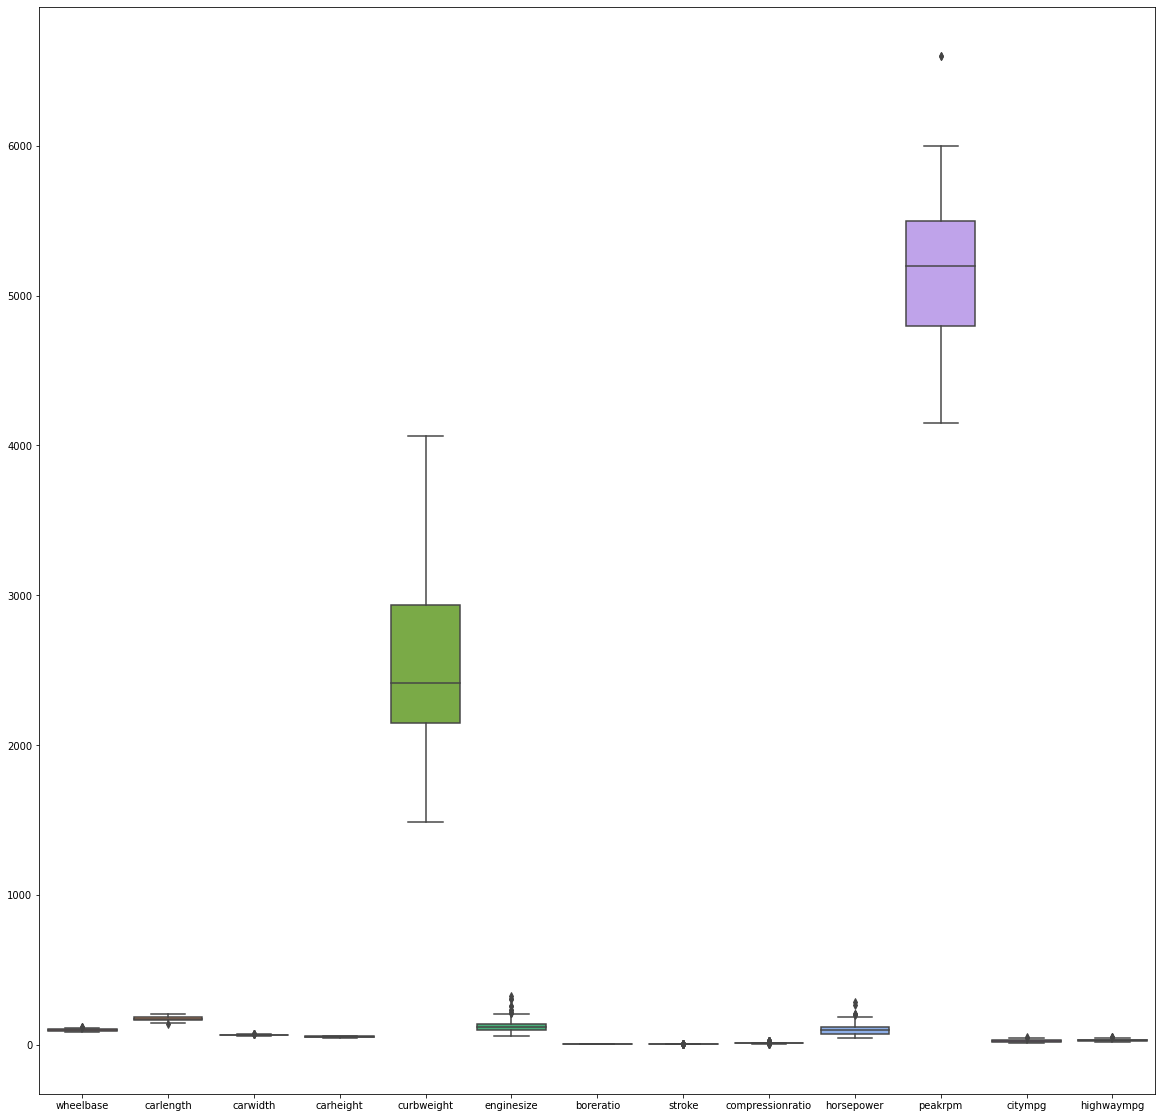

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 20))
sns.boxplot(data=cars_numeric.iloc[:,1:-1])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_std = ss.fit_transform(cars_numeric.iloc[:, 1:-1])
cars_std

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.57769233,
        -0.95301169, -0.83719538]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
cars_normalized = mms.fit_transform(cars_numeric.iloc[:, 1:-1])

In [ ]:
cars_normalized

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.34693878, 0.16666667,
        0.26315789],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.55102041, 0.13888889,
        0.18421053],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.26530612, 0.36111111,
        0.28947368],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.51020408, 0.16666667,
        0.23684211]])

In [ ]:
cars_normalized = pd.DataFrame.from_records(cars_normalized)
print(cars_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    float64
 1   1       205 non-null    float64
 2   2       205 non-null    float64
 3   3       205 non-null    float64
 4   4       205 non-null    float64
 5   5       205 non-null    float64
 6   6       205 non-null    float64
 7   7       205 non-null    float64
 8   8       205 non-null    float64
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
dtypes: float64(13)
memory usage: 20.9 KB
None


<Axes: >

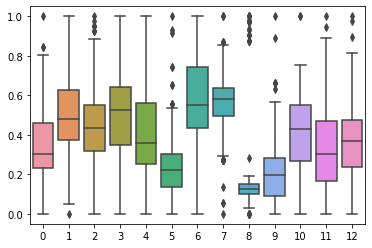

In [ ]:

sns.boxplot(data=cars_normalized)

In [ ]:
cars_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.354419,0.491780,0.467317,0.493740,0.414106,0.248707,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190
std,0.175562,0.184139,0.178767,0.203627,0.201971,0.157142,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.376119,0.316667,0.350000,0.254849,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842
50%,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421
75%,0.460641,0.626866,0.550000,0.641667,0.561288,0.301887,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. ***Data cleaning***

Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

In [ ]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [ ]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [ ]:
#creating  New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

In [ ]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [ ]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

***Data Preparation***

In [ ]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)


In [ ]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.42867200e+03 -1.03559660e+03  1.01888231e+03 -1.15873387e+03
  2.85666815e+03  1.00138355e+04 -3.87704419e+03 -1.10636783e+03
 -1.64495646e+03 -3.76575457e+02  1.36389023e+03  2.98292499e+02
  3.40952205e+02  9.43141853e+02  8.06571669e+02  7.42732629e+02
  5.45710768e+02  5.38903668e+02 -6.78481345e+02  9.36209374e+02
 -1.69785914e+02 -6.97327291e+02 -1.54168256e+03 -1.24109698e+03
 -7.35526211e+02  3.01615423e+01  4.16324963e+02  1.15338117e+03
  4.51916659e+02  1.83770778e+01  5.93883150e+02  7.29058348e+02
 -1.27478292e+02  1.72349079e+03  1.52024069e+03  5.35664282e+03
  9.39868116e+02  1.58062099e+03 -1.06868097e+03  1.72349079e+03
  2.15570033e+02 -2.24899856e+02  6.78481345e+02 -1.58967205e+02
 -5.30164306e+02 -2.42345680e+02  1.59161573e-12  5.44791598e+02
  2.05287035e+03  2.69267224e+02 -3.69539514e+02 -8.43460922e+02
 -7.62755467e+02 -1.82223318e+02 -3.77083421e+02  3.06308271e+01
 -6.75015599e-13 -1.18412317e+03 -8.62599947e+01 -4.69558996e+02
 -7.78604754e+02  1.12304

In [ ]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8317639740326515


we are getting approx. 83% r-squared with all the variables. Let's see how much we can get with lesser features.

***Model Building Using RFE*** 

Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the statsmodels library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

In [ ]:
# RFE with 15 features
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe_15 = RFE(lm,n_features_to_select=15,step=1)
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_) 


[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False  True]
[12 29  1 13  1  1  1  1 21 36 11 39 33 17 27 26 25 28 18  4 38  8  5  6
  7 49 32  1 23 52 10  3 42  1  1  1 22  1  1  1 14 43 20 46 44 45 53 19
  1 24 34 15 30 41 37 50 54  9 47 35 16  1 48  2 31 40 51  1]


In [ ]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8548871855688107


In [ ]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm,n_features_to_select=15,step=1)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8548871855688107


RFE with 6 features is giving about 88% r-squared, compared to 89% with 15 features. A better metric to look at is adjusted r-squared, which penalises a model for having more features, and thus weighs both the goodness of fit and model complexity.

***Model Building and Evaluation***

In [ ]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_porsche,car_company_volvo
3,1.0,0.136542,-0.420797,-0.431076,-0.517266,0.462183,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.158114,-0.23812
157,1.0,-0.704593,-0.859758,-0.695874,-0.517266,-0.720563,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.158114,-0.23812
81,1.0,-0.237296,-0.438125,-0.118132,0.074927,0.653980,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.158114,-0.23812
32,1.0,-0.891512,-1.383431,-1.153254,-1.553603,-0.592699,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.158114,-0.23812
99,1.0,-0.330755,-0.445826,-0.166277,0.000903,0.685946,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.158114,-0.23812


In [ ]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           6.08e-83
Time:                        10:12:58   Log-Likelihood:                -1470.2
No. Observations:                 164   AIC:                             2970.
Df Residuals:                     149   BIC:                             3017.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.343e+

In [ ]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 160 to 74
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  41 non-null     float64
 1   carwidth               41 non-null     float64
 2   curbweight             41 non-null     float64
 3   enginesize             41 non-null     float64
 4   boreratio              41 non-null     float64
 5   stroke                 41 non-null     float64
 6   enginelocation_rear    41 non-null     float64
 7   enginetype_rotor       41 non-null     float64
 8   cylindernumber_five    41 non-null     float64
 9   cylindernumber_four    41 non-null     float64
 10  cylindernumber_three   41 non-null     float64
 11  cylindernumber_twelve  41 non-null     float64
 12  cylindernumber_two     41 non-null     float64
 13  car_company_bmw        41 non-null     float64
 14  car_company_porsche    41 non-null     float64
 15  car_co

In [ ]:
# r-squared
r2_score(y_test, y_pred)

0.8548871855688103

Thus, the test r-squared of model with 15 features is about 89.4%, while training is about 93%. Let's compare the same for the model with 6 features.

In [ ]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)


# fitting the model with 6 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()   
print(lm_6.summary())


# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]


# Adding a constant  
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()


# # Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           6.08e-83
Time:                        10:12:58   Log-Likelihood:                -1470.2
No. Observations:                 164   AIC:                             2970.
Df Residuals:                     149   BIC:                             3017.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.343e+

In [ ]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.8548871855688103

Thus, for the model with 6 variables, the r-squared on training and test data is about 89% and 88.5% respectively. The adjusted r-squared is about 88.6%.

***Choosing the optimal number of features***

Now, we have seen that the adjusted r-squared varies from about 93.3 to 88 as we go from 15 to 6 features, one way to choose the optimal number of features is to make a plot between n_features and adjusted r-squared, and then choose the value of n_features.

In [ ]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm,n_features_to_select=n_features,)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

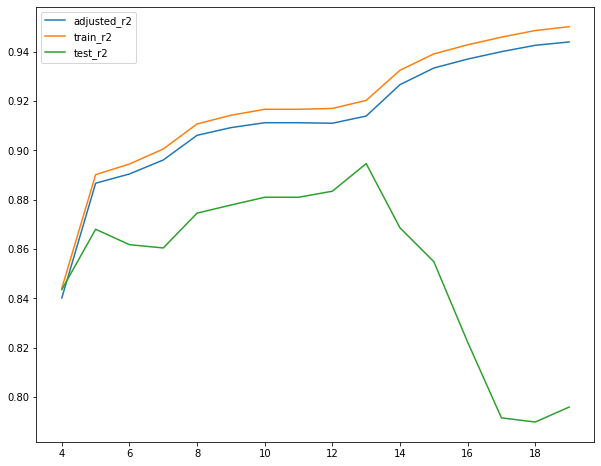

In [ ]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

Based on the plot, we can choose the number of features considering the r2_score we are looking for. Note that there are a few caveats in this approach, and there are more sopisticated techniques to choose the optimal number of features:

Cross-validation: In this case, we have considered only one train-test split of the dataset; the values of r-squared and adjusted r-squared will vary with train-test split. Thus, cross-validation is a more commonly used technique (you divide the data into multiple train-test splits into 'folds', and then compute average metrics such as r-squared across the 'folds'

The values of r-squared and adjusted r-squared are computed based on the training set, though we must always look at metrics computed on the test set. For e.g. in this case, the test r2 actually goes down with increasing n - this phenomenon is called 'overfitting', where the performance on training set is good because the model has in some way 'memorised' the dataset, and thus the performance on test set is worse.

Thus, we can choose anything between 4 and 12 features, since beyond 12, the test r2 goes down; and at lesser than 4, the r2_score is too less.

In fact, the test_r2 score doesn't increase much anyway from n=6 to n=12. It is thus wiser to choose a simpler model, and so let's choose n=6.

Final Model
Let's now build the final model with 6 features.

In [ ]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm,n_features_to_select=6)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [ ]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           5.58e-74
Time:                        10:21:53   Log-Likelihood:                -1515.3
No. Observations:                 164   AIC:                             3045.
Df Residuals:                     157   BIC:                             3066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.332e+04    199.664     66.730      0.000    1.29e+04    1.37e+04
carwidth             1978.5210    408.902      4.839      0.000    1170.862    2786.180
curbweight           2372.0001    539.871      4.394      0.000    1305.653    3438.347
enginesize           2350.9846    447.451      5.254      0.000    1467.184    3234.786
enginelocation_rear  1693.1043    324.456      5.218      0.000    1052.243    2333.965
car_company_bmw      1784.5703    213.694      8.351      0.000    1362.484    2206.656
car_company_porsche   742.7171    293.472      2.531      0.012     163.054    1322.381
==============================================================================
Omnibus:                       11.923   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.498
Skew:                           0.535   Prob(JB):                      0.00117
Kurtosis:                       3.911   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# results 
r2_score(y_test, y_pred)

0.8617667356702006